In [37]:
import os
import requests
import shutil
from PIL import Image

import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [33]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

def imageLoader(image_name):
    image = Image.open('temp/temp.jpg')
    image = transform(image).float()
    return image

classes = ('10c', '10d', '10h', '10s',
           '11c', '11d', '11h', '11s',
           '12c', '12d', '12h', '12s',
           '13c', '13d', '13h', '13s',
           '1c', '1d', '1h', '1s',
           '2c', '2d', '2h', '2s',
           '3c', '3d', '3h', '3s',
           '4c', '4d', '4h', '4s',
           '5c', '5d', '5h', '5s',
           '6c', '6d', '6h', '6s',
           '7c', '7d', '7h', '7s',
           '8c', '8d', '8h', '8s',
           '9c', '9d', '9h', '9s',
           'emp', 'jok')

In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 *104 * 216, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 58)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
net.load_state_dict(torch.load('model/4-linear-50-epoch.pth', map_location=torch.device('cpu')))
net.eval()

Net(
  (fc1): Linear(in_features=67392, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=58, bias=True)
)

In [25]:
def getImage():
    url = "http://192.168.197.139/capture"
    res = requests.get(url, stream=True)
    with open('temp/temp.jpg', 'wb') as f:
        shutil.copyfileobj(res.raw, f)

In [30]:
def processImage():
    im = Image.open('temp/temp.jpg')
    width, height = im.size

    left = width / 5
    top = height / 6
    bottom = height / 5 * 3
    right = width / 8 * 7

    im_crop = im.crop((left, top, right, bottom))
    im_crop.save('temp/temp.jpg')

In [57]:
def evaluateImage():
    getImage()
    processImage()
    image = imageLoader('temp/temp.jpg')
    output = net(image.view(-1, 3 * 104 * 216))
    print("Prediction is: " + classes[torch.argmax(output)])
    plt.imshow(image[0])
    plt.show()

Prediction is: 9d


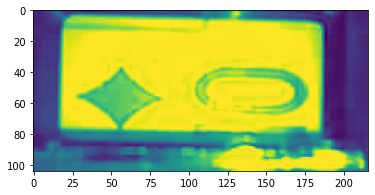

In [59]:
evaluateImage()